In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Questão 01

In [2]:
def normalize(df: pd.DataFrame) -> pd.DataFrame:
    
    df_norm = (df - df.mean())/df.std()
    
    return df_norm

In [3]:
def pca(X: pd.DataFrame, n_dim: int) -> tuple:

    a, w = np.linalg.eig(X.corr())

    idx_sorted = np.flip(np.argsort(a))

    W = np.zeros([X.shape[1], n_dim])

    for i in range(n_dim):
        W[:, i] = w[:, idx_sorted[i]]

    z = np.dot(W.T, X.T)

    return W, z.T

In [4]:
data = pd.read_csv('data/dados_lista3.csv', header = None, names = ['X1', 'X2', 'X3'])

In [5]:
print(data.mean())

X1    2.523896
X2   -2.812758
X3    0.303879
dtype: float64


In [6]:
data_norm = normalize(data)

In [7]:
print(data_norm.corr())

          X1        X2        X3
X1  1.000000 -0.533858 -0.606122
X2 -0.533858  1.000000  0.940140
X3 -0.606122  0.940140  1.000000


In [8]:
a, w = np.linalg.eig(data_norm.corr())

print(a)
print(w)

[2.40348266 0.54101145 0.05550589]
[[ 0.49831409 -0.86283557  0.08484009]
 [-0.60532847 -0.41630393 -0.6784309 ]
 [-0.62069357 -0.28671556  0.72974905]]


In [13]:
pov = np.cumsum(a)/np.sum(a)

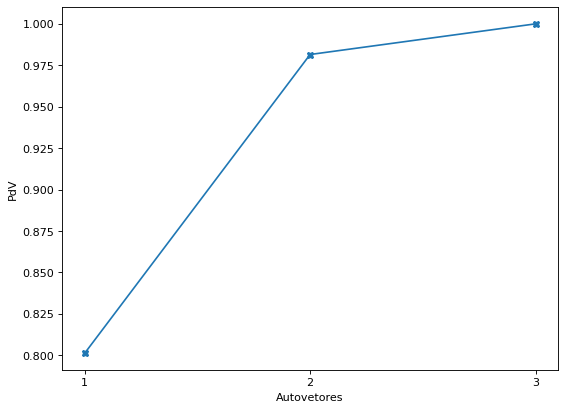

In [34]:
fig = plt.figure()
fig.set_size_inches(8,6)
fig.set_dpi(80)

plt.plot([1, 2, 3], pov, marker = 'X')
plt.xlabel('Autovetores')
plt.ylabel('PdV')
plt.xticks([1, 2, 3])
plt.savefig('images/plotq1c')
plt.show()

In [25]:
W1, z1 = pca(data_norm, 1)
W2, z2 = pca(data_norm, 2)

In [57]:
W2

array([[ 0.49831409, -0.86283557],
       [-0.60532847, -0.41630393],
       [-0.62069357, -0.28671556]])

In [46]:
X1_reconstructed = np.dot(W1, z1.T).T
X2_reconstructed = np.dot(W2, z2.T).T

In [2]:
fig = plt.figure()
fig.set_size_inches(8,6)
fig.set_dpi(300)
ax = fig.add_subplot(projection = '3d')
ax.scatter(data_norm['X1'], data_norm['X2'], data_norm['X3'], label = 'Dados originais')
ax.scatter(X1_reconstructed[:, 0], X1_reconstructed[:, 1], X1_reconstructed[:, 2], color = 'red', label = 'Dados reconstrúidos (1 a.v)')
ax.scatter(X2_reconstructed[:, 0], X2_reconstructed[:, 1], X2_reconstructed[:, 2], color = 'green', label = 'Dados reconstrúidos (2 a.v)')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# ax.view_init(90, 0)
plt.legend(loc = 'upper right')
plt.savefig('images/plotq1d')
plt.show()

NameError: name 'plt' is not defined

In [54]:
data_norm.mean()

X1   -2.842171e-17
X2    1.421085e-17
X3   -1.421085e-17
dtype: float64

In [50]:
X2_reconstructed.mean(axis = 0)

array([-1.42108547e-17,  1.42108547e-17,  0.00000000e+00])

In [51]:
X2_reconstructed.std(axis = 0)

array([0.99930019, 0.98664985, 0.98461708])

In [52]:
X1_reconstructed.mean(axis = 0)

array([ 0.00000000e+00, -7.10542736e-18,  7.10542736e-18])

In [53]:
X1_reconstructed.std(axis = 0)

array([0.77215842, 0.93798164, 0.96179051])

Questão 02

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [5]:
data = load_iris()

In [6]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])

In [11]:
pd.concat([X, y], axis = 1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [11]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y = pd.DataFrame(data['target'], columns = ['target'])

In [34]:
mapping = {i : data['target_names'][i] for i in range(y['target'].max() + 1)}

In [16]:
clusters = range(1, 11)
inertia = {}

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 0) 
    model.fit(X)
    
    inertia[k] = model.inertia_
    

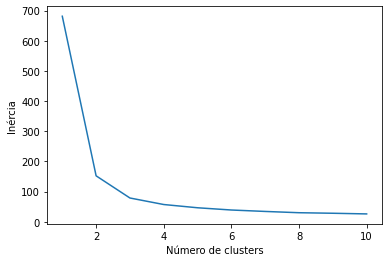

In [17]:
plt.plot(inertia.keys(), inertia.values())
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.show()

Questão 03

In [6]:
from sklearn.manifold import MDS

In [4]:
cities = pd.read_csv('data/tabela_questao3.csv', sep = ';', index_col = 0)

In [5]:
cities

,Brasilia,Manaus,Natal,Sao Paulo,Porto alegre,Rio de Janeiro,Rio Branco
Brasilia,0,1950,1775,872,1618,931,2256
Manaus,1950,0,2760,2675,3132,2838,1145
Natal,1775,2760,0,2322,3168,2086,3617
Sao Paulo,872,2675,2322,0,858,360,2694
Porto alegre,1618,3132,3168,858,0,1116,2814
Rio de Janeiro,931,2838,2086,360,1116,0,2991
Rio Branco,2256,1145,3617,2694,2814,2991,0


In [7]:
mds_model = MDS(n_components = 2, random_state = 0, dissimilarity = 'precomputed')

In [9]:
mds_coordinates = mds_model.fit_transform(cities)

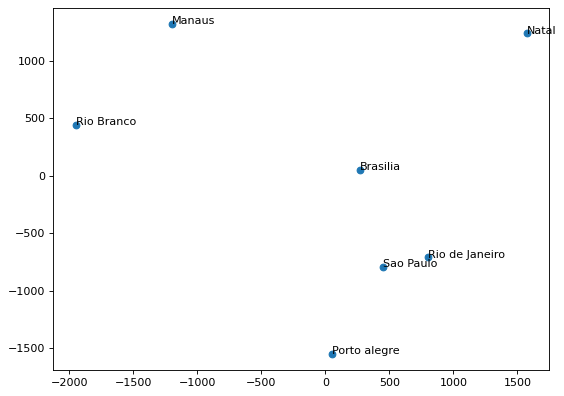

In [15]:
fig = plt.figure()
fig.set_size_inches(8,6)
fig.set_dpi(80)

labels = cities.columns
plt.scatter(mds_coordinates[:, 0], mds_coordinates[:, 1])

for label, x, y, in zip(labels, mds_coordinates[:, 0], mds_coordinates[:, 1]):
    plt.annotate(label, (x, y))
    
plt.show()